In [1]:
# 1. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# 2. Load Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [3]:
# 3. Preprocess the Data (Feature Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# 4. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [5]:
# 5. Train Non-Linear SVM Model
svm_model = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_model.fit(X_train, y_train)


SVC()

In [6]:
# 6. Evaluate the Model
y_pred = svm_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [7]:
# 7. Visualize the Results with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
svm_model_pca = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_model_pca.fit(X_train_pca, y_train)


SVC()

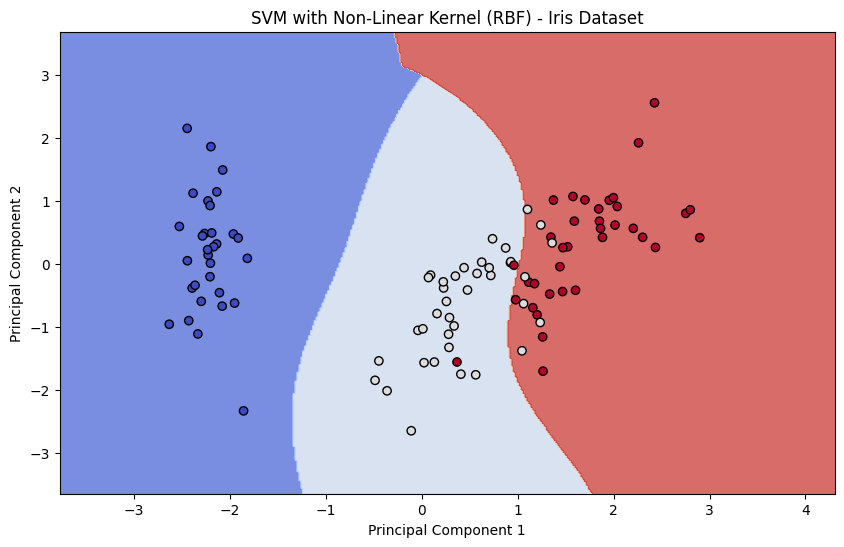

In [8]:
# 8. Plot the decision boundaries
h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title('SVM with Non-Linear Kernel (RBF) - Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
